In [6]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

### Universal bank dataset


For this lab, we will use the Universal bank dataset. You will use different classification methods to predict whether a customer accepts their personal loan. There are a total of 5,000 customers in the data set and 14 variables. The variables are self-explanatory.

In [7]:
## Excerpt of the dataset
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Data Preparation

In [8]:
#1. 1.Read dataframe. Do not include ID and Zip Code in the analysis. 
#DROP ID and ZipCode 
#df.drop(columns=['Column1', 'Column2'])
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)
bank_df.columns = [c.replace(' ', '_') for c in bank_df.columns]
bank_df.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
#2. 2.Convert categorical variables as dummies 
#[use the get_dummies() function from the pandas library]
bank_df['Education'] = bank_df['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
bank_df.Education.cat.rename_categories(new_categories, inplace=True)
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=True)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


In [10]:
#3. 3.Use a 70/30 split into train/valid. Create trainx, trainy, validx, validy
#trainx, validx, trainy, validy = train_test_split(x, y, test_size=0.3, random_state=1)
X = bank_df.drop(columns=['Personal_Loan'])
y = bank_df['Personal_Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
###################################################################################
# 1. 1.	What is the target variable? How many instances are positive?             #
###################################################################################

A: y = bank_df['Personal_Loan']

In [7]:
###################################################################################
# 2. Build three classifiers: Decision Tree, Naïve Bayes, and Logistic Regression
# For each of the three classifiers:
# a. What are the 3 most important variables? 
# b. Calculate accuracy, precision, recall, and f-measure
###################################################################################

# Decision Trees

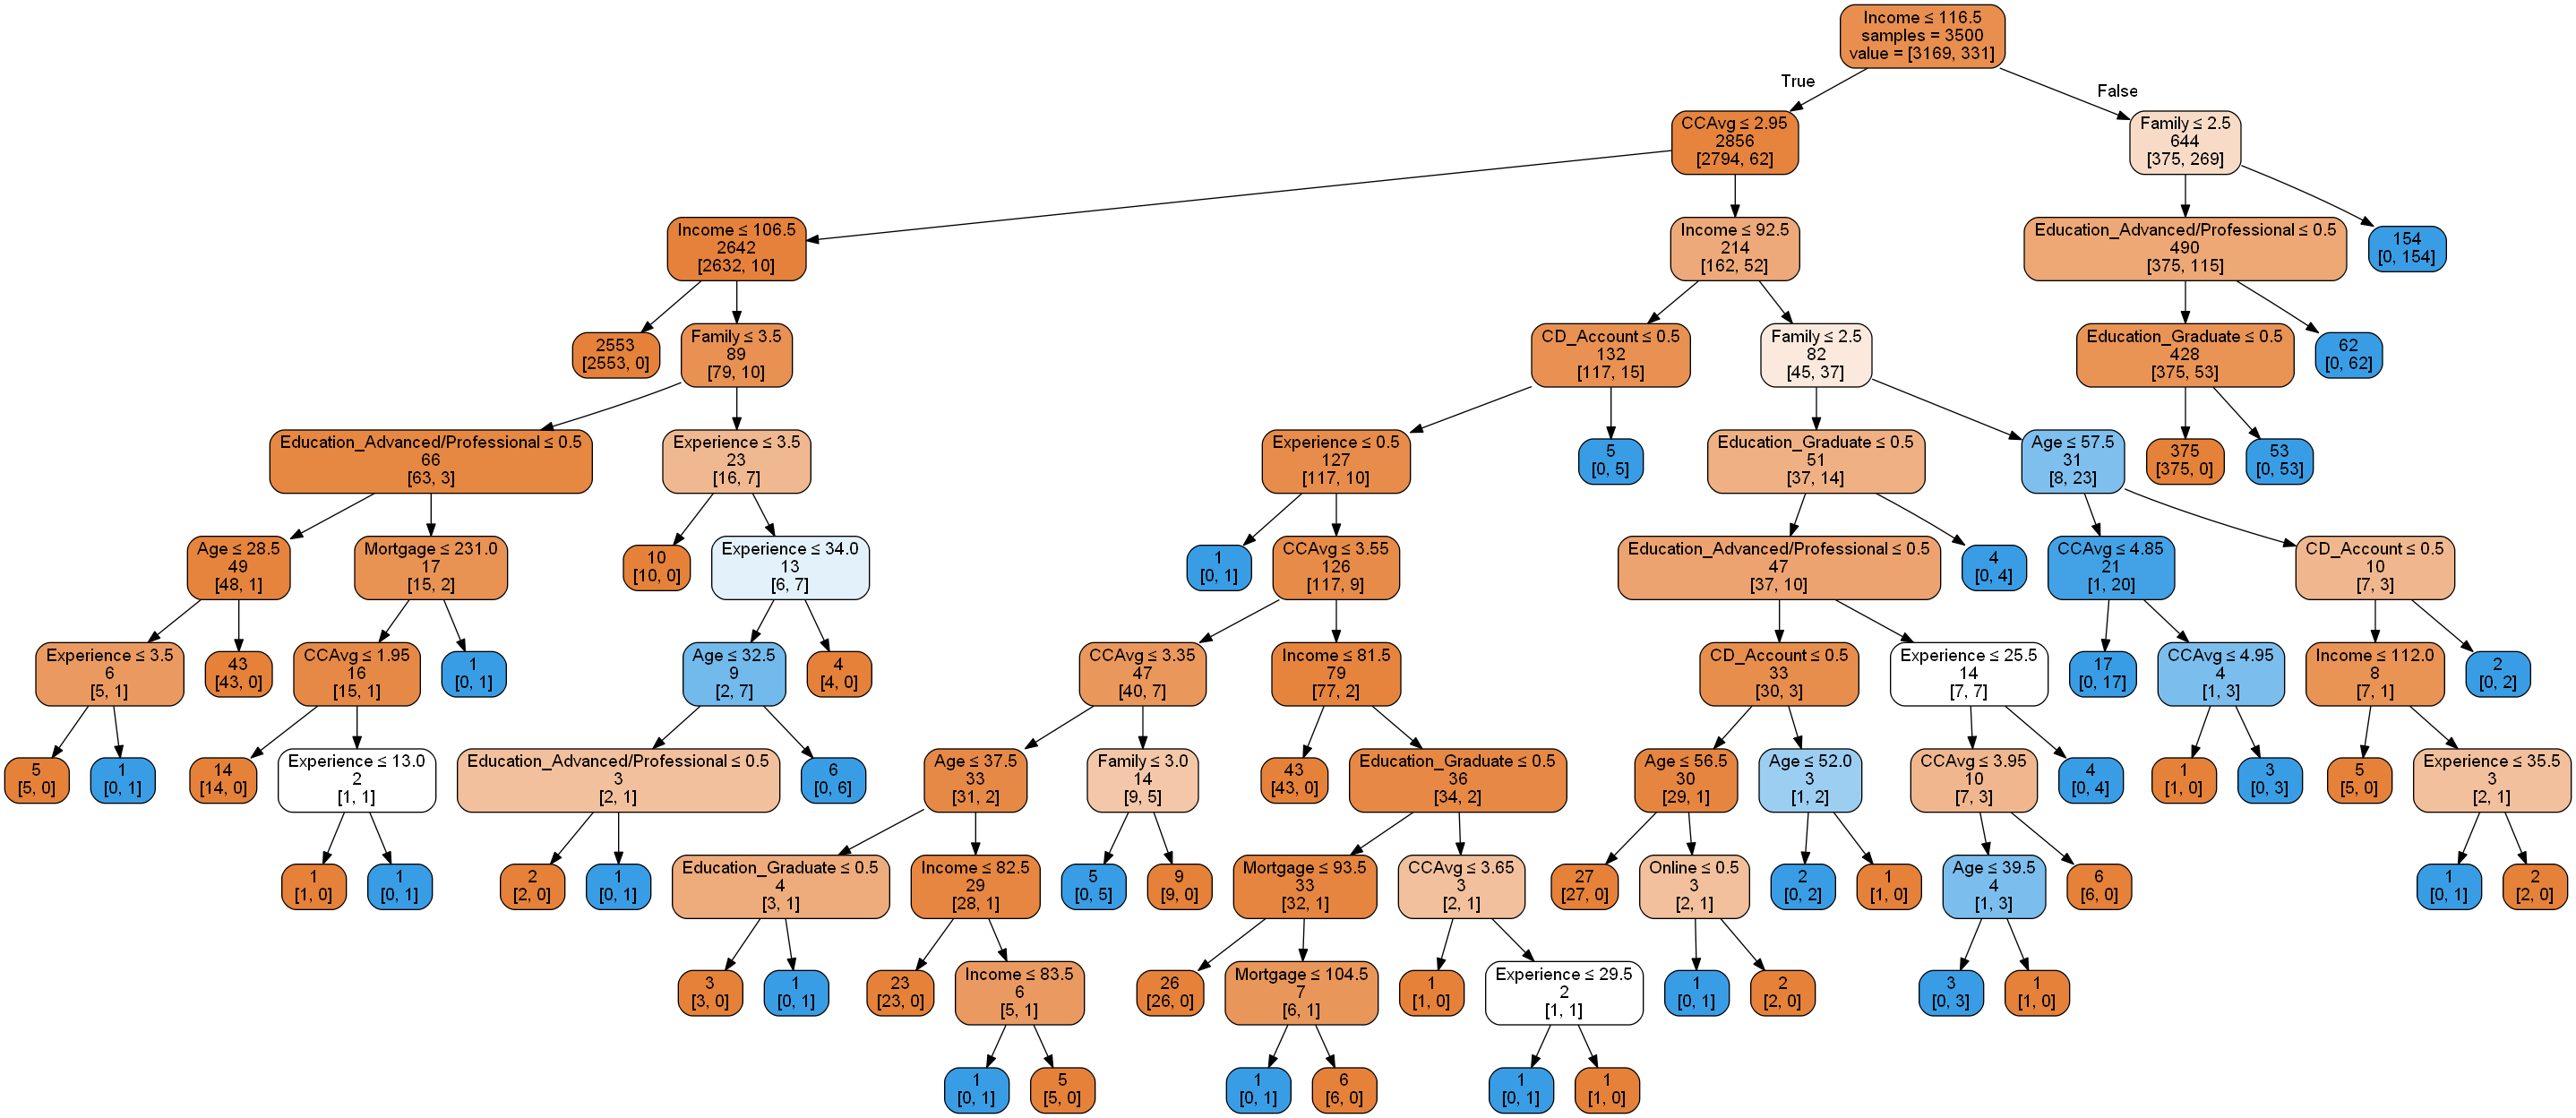

In [11]:
#Build decision tree

#code here
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [12]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3169    0
     1    0  331
Confusion Matrix (Accuracy 0.9847)

       Prediction
Actual    0    1
     0 1345    6
     1   17  132


In [10]:
#get the accuracy score
from sklearn.metrics import accuracy_score
# Get the prediction for both train and test
prediction_train = fullClassTree.predict(train_X)#use the DT model to predict on the training data
prediction_valid =  fullClassTree.predict(valid_X)#use the DT model to predict on the validation data

# Measure the accuracy of the model for both train and test sets
print("Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

Accuracy on train is: 1.0
Accuracy on test is: 0.9853333333333333


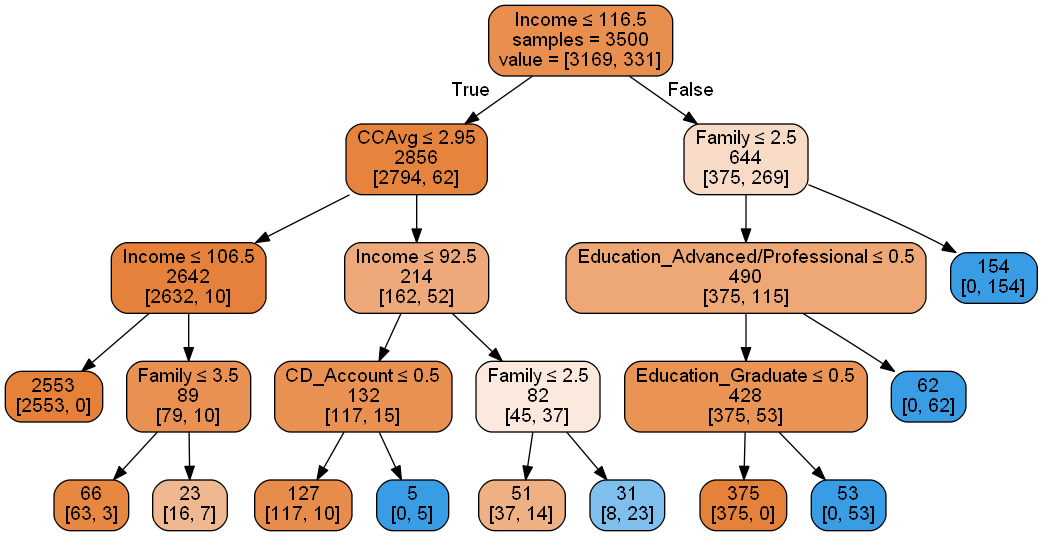

In [14]:
DecisionTree = DecisionTreeClassifier(max_depth = 4)
DecisionTree.fit(train_X, train_y)

plotDecisionTree(DecisionTree, feature_names=train_X.columns)

In [15]:
from sklearn.metrics import accuracy_score
# Get the prediction for both train and test
prediction_train = DecisionTree.predict(train_X)
prediction_valid = DecisionTree.predict(valid_X)

# Measure the accuracy of the model for both train and test sets
print("Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

Accuracy on train is: 0.988
Accuracy on test is: 0.98


# Logistic Regression

In [16]:
#build the logistic regression model logit_reg
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#code here
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns))
print()

intercept  -12.782037230840281
                                    coeff
Age                             -0.020892
Experience                       0.026182
Income                           0.058844
Family                           0.649518
CCAvg                            0.210981
Mortgage                         0.001011
Securities_Account              -1.156411
CD_Account                       3.832765
Online                          -0.660941
CreditCard                      -1.068830
Education_Graduate               3.908478
Education_Advanced/Professional  4.051081



In [17]:
prediction_train = logit_reg.predict(train_X)
prediction_valid = logit_reg.predict(valid_X)
print("Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

Accuracy on train is: 0.9574285714285714
Accuracy on test is: 0.958


# Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB
# run naive Bayes
X = bank_df.drop(columns=['Personal_Loan'])
y = bank_df['Personal_Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
nb = GaussianNB()
nb.fit(train_X, train_y)

# predict probabilities
prediction_train = nb.predict_proba(train_X)
prediction_valid = nb.predict_proba(valid_X)
print(pd.DataFrame({'coeff': nb.theta_[0]}, index=X.columns))
print() 

                                     coeff
Age                              45.523193
Experience                       20.287157
Income                           66.107289
Family                            2.369517
CCAvg                             1.715762
Mortgage                         51.449353
Securities_Account                0.102872
CD_Account                        0.036605
Online                            0.588514
CreditCard                        0.296308
Education_Graduate                0.271379
Education_Advanced/Professional   0.289997



In [14]:
###################################################################################
# 3. Which one is the best performing model/classifier? Why                       #
###################################################################################

A: Income. Because Income has the highest coeff.

In [15]:
###################################################################################
# 4. Create a meaningful visualization between the variable and the target variable #
# of interest [for the top 2 most important variables from (3)]                     #
###################################################################################

In [16]:
approve_df = bank_df[bank_df['Personal_Loan']==1]['Income']

In [17]:
not_approve_df = bank_df[bank_df['Personal_Loan']==0]['Income']

[Text(0, 0.5, 'Probability '),
 Text(0.5, 0, 'Income'),
 Text(0.5, 1.0, 'Income vs Personal Loan')]

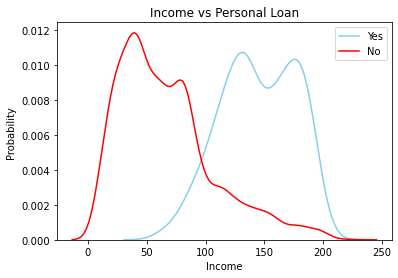

In [29]:
import seaborn as sns
# Make default histogram of sepal length
sns.distplot(approve_df,color='skyblue',hist = False, kde = True, label='Approved')
sns.distplot(not_approve_df,color='red', hist = False, kde = True, label='Rejected').set(title = 'Income vs Personal Loan', xlabel = 'Income', ylabel = 'Density ')


In [20]:
approve_df_m = bank_df[bank_df['Personal_Loan']==1]['Mortgage']
not_approve_df_m = bank_df[bank_df['Personal_Loan']==0]['Mortgage']

[Text(0, 0.5, 'Probability '),
 Text(0.5, 0, 'Mortgage'),
 Text(0.5, 1.0, 'Mortgage vs Personal Loan')]

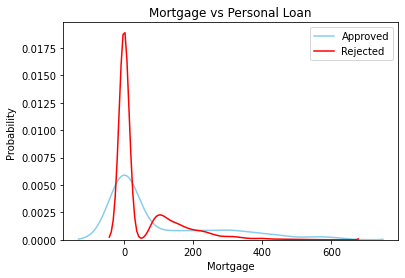

In [31]:
sns.distplot(approve_df_m,color='skyblue',hist = False, kde = True,label='Approved')
sns.distplot(not_approve_df_m,color='red', hist = False, kde = True,label='Rejected').set(title = 'Mortgage vs Personal Loan', xlabel = 'Mortgage', ylabel = 'Density ')

#############################################################################################
5.Based on these outputs what are some key insights from the analysis? (2-3 bullet points)#
#############################################################################################

A: 1. we need to ajust parameters of model to find the best model

2. All variables predict the loan acceptance. Using single variable is not accurate.

In [27]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score

In [28]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [29]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

y_pred, y_pred_prob = get_predictions(GaussianNB(), train_X, train_y, valid_X)
print_scores(valid_y,y_pred,y_pred_prob)

train-set confusion matrix:
 [[2915  254]
 [ 134  197]]
test-set confusion matrix:
 [[1228  123]
 [  65   84]]
recall score:  0.5637583892617449
precision score:  0.4057971014492754
f1 score:  0.4719101123595506
accuracy score:  0.8746666666666667
ROC AUC: 0.912786451994297


In [30]:
NB_varimportance_0 = pd.DataFrame({'attribute': train_X.columns, 'importance': nb.theta_[0]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
2,Income,66.107289
5,Mortgage,51.449353
0,Age,45.523193
1,Experience,20.287157
3,Family,2.369517
4,CCAvg,1.715762
8,Online,0.588514
9,CreditCard,0.296308
11,Education_Advanced/Professional,0.289997
10,Education_Graduate,0.271379


In [31]:
NB_varimportance_0 = pd.DataFrame({'attribute': train_X.columns, 'importance': nb.theta_[1]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
2,Income,145.758308
5,Mortgage,100.148036
0,Age,44.595166
1,Experience,19.386707
4,CCAvg,4.026647
3,Family,2.640483
8,Online,0.616314
11,Education_Advanced/Professional,0.416918
10,Education_Graduate,0.386707
7,CD_Account,0.311178
